# NFL Player Analysis
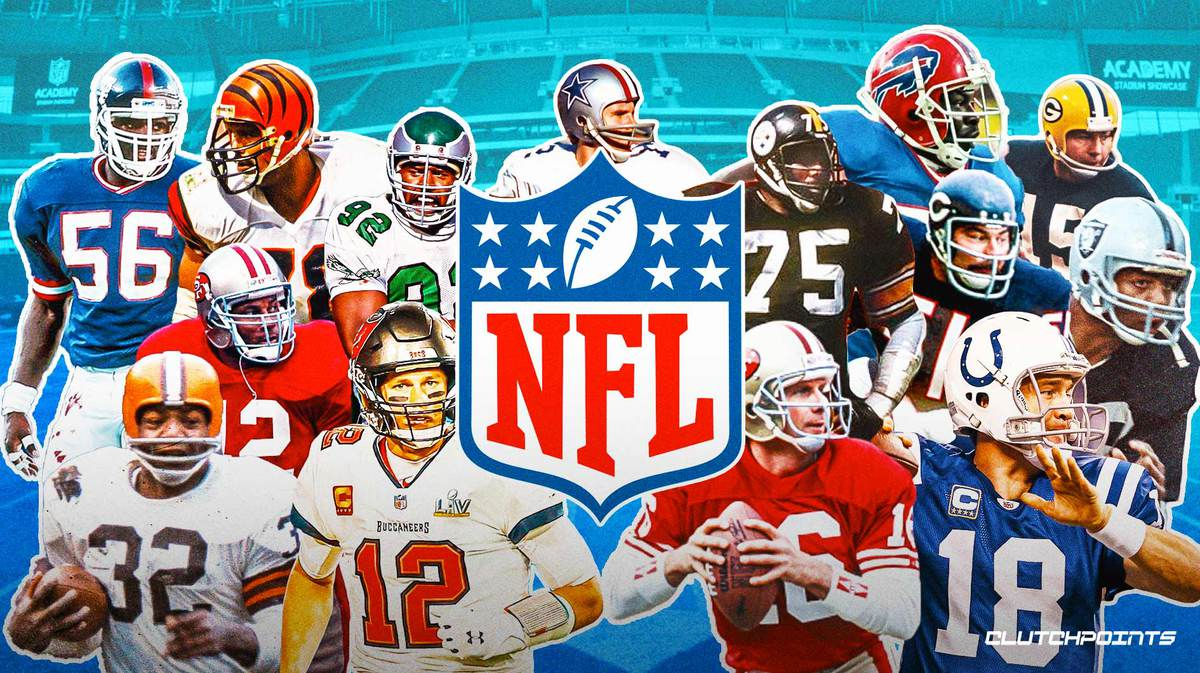

By: Daniel Sontag

Utilizing data from Pro Football Focus (https://www.pff.com/), I performed NFL player analysis and trends over data for the last 10 years. This analysis will be performed across six drastically different position - Quarterback, Running Back, Tackle, Cornerback, Linebacker and Defensive End. I'll use statisical analysis in an attempt to located the age of maximum performance across all six positions. Additionally, I'll look at which colleges are producing the largest number of NFL caliber players at each position. 

In [4]:
import json
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import datetime as dt

While investigating the Pro Football Focus website, I was able to locate the API populating the data located here (https://www.pff.com/nfl/grades/position/qb). The API data was in JSON format and I was able to manipulate the web address to pull back multiple years and NFL positions. I created a JSON dictionary for each position with data for the last 10 years and stored them in separate .JSON files within my project folder. In the code below, I loop through each JSON file and pull out the player data while adding the year to each line of data. I store all of this data in separate DataFrames for each position. 

In [5]:
QBJSONData = open('QB_JSON_DATA.json')
QBdata = json.load(QBJSONData)
QBdf = pd.DataFrame()
for year in range (2012, 2022):
    QB = QBdata[str(year) + '_players']
    QB = pd.DataFrame(QB)
    QB['Year'] = year
    QBdf = pd.concat([QBdf, QB], axis=0)

RBJSONData = open('RB_JSON_DATA.json')
RBdata = json.load(RBJSONData)
RBdf = pd.DataFrame()
for year in range (2012, 2022):
    RB = RBdata[str(year) + '_players']
    RB = pd.DataFrame(RB)
    RB['Year'] = year
    RBdf = pd.concat([RBdf, RB], axis=0)

TACKLEJSONData = open('TACKLE_JSON_DATA.json')
TACKLEdata = json.load(TACKLEJSONData)
TACKLEdf = pd.DataFrame()
for year in range (2012, 2022):
    TACKLE = TACKLEdata[str(year) + '_players']
    TACKLE = pd.DataFrame(TACKLE)
    TACKLE['Year'] = year
    TACKLEdf = pd.concat([TACKLEdf, TACKLE], axis=0)

EDGEJSONData = open('EDGE_JSON_DATA.json')
EDGEdata = json.load(EDGEJSONData)
EDGEdf = pd.DataFrame()
for year in range (2012, 2022):
    EDGE = EDGEdata[str(year) + '_players']
    EDGE = pd.DataFrame(EDGE)
    EDGE['Year'] = year
    EDGEdf = pd.concat([EDGEdf, EDGE], axis=0)

LBJSONData = open('LB_JSON_DATA.json')
LBdata = json.load(LBJSONData)
LBdf = pd.DataFrame()
for year in range (2012, 2022):
    LB = LBdata[str(year) + '_players']
    LB = pd.DataFrame(LB)
    LB['Year'] = year
    LBdf = pd.concat([LBdf, LB], axis=0)

CBJSONData = open('CB_JSON_DATA.json')
CBdata = json.load(CBJSONData)
CBdf = pd.DataFrame()
for year in range (2012, 2022):
    CB = CBdata[str(year) + '_players']
    CB = pd.DataFrame(CB)
    CB['Year'] = year
    CBdf = pd.concat([CBdf, CB], axis=0)

In the next two codeblocks, I clean the data by removing any player that doesn't include an age and set a minimum of 300 snaps that a player must play for their data to be included. This minimum snap count helps remove anomalies for players that didn't see significant playing time throughout the year. Lastly, the data provided by Football Focus provided the current age of the players for each season. With each season ending approximately around the end of the year (example last regular season game of 2021 ended on 12/26/2021), I took their current age and subtracted the difference from current year minus year of season played.  

In [6]:
Offense_df = pd.concat([QBdf, RBdf, TACKLEdf], axis=0)
Offense_df = Offense_df.loc[(Offense_df['age'] != "")]
Offense_df = Offense_df[Offense_df['offense_snaps'] > 300]
Offense_df['age'] = pd.to_numeric(Offense_df['age'])
today = dt.date.today()
Offense_df['age'] = round(Offense_df['age'] - (today.year - Offense_df['Year'] - today.month/12), 1)
Offense_df = Offense_df[['name', 'grade_position', 'offense', 'age', 'height', 'weight', 'college', 'Year']]
Offense_df = Offense_df.rename(columns={'name': 'Name', 'grade_position': 'Position', 'offense': 'Grade', 'age':'Age', 'height': 'Height', 'weight': 'Weight', 'college': 'College'})
Offense_df.loc[Offense_df['Position'] == 'T', 'Position'] = 'Tackle' 
Offense_df.loc[Offense_df['Position'] == 'QB', 'Position'] = 'Quarterback'
Offense_df.loc[Offense_df['Position'] == 'HB', 'Position'] = 'RunningBack'
Offense_df

,Name,Position,Grade,Age,Height,Weight,College,Year
2,Carson Palmer,Quarterback,65.7,33.1,605.0,230.0,USC,2012
4,Tony Romo,Quarterback,73.9,32.8,602.0,219.0,E ILLINOIS,2012
5,Eli Manning,Quarterback,78.7,32.1,605.0,220.0,OLE MISS,2012
6,Philip Rivers,Quarterback,64.1,31.1,605.0,228.0,NC STATE,2012
7,Ben Roethlisberger,Quarterback,86.2,30.9,605.0,240.0,MIAMI OH,2012
...,...,...,...,...,...,...,...,...
141,Donovan Smith,Tackle,80.5,28.6,606.0,338.0,PENN STATE,2021
142,Rob Havenstein,Tackle,83.4,29.7,608.0,330.0,WISCONSIN,2021
145,Trent Brown,Tackle,73.8,28.8,608.0,380.0,FLORIDA,2021
146,La'el Collins,Tackle,80.2,28.5,604.0,320.0,LSU,2021


In [7]:
Defense_df = pd.concat([EDGEdf, LBdf, CBdf], axis=0)
Defense_df = Defense_df.loc[(Defense_df['age'] != "")]
Defense_df = Defense_df[Defense_df['defense_snaps'] > 300]
Defense_df['age'] = pd.to_numeric(Defense_df['age'])
Defense_df['age'] = pd.to_numeric(Defense_df['age'])
today = dt.date.today()
Defense_df['age'] = round(Defense_df['age'] - (today.year - Defense_df['Year'] - today.month/12), 1)
Defense_df = Defense_df[['name', 'grade_position', 'defense', 'age', 'height', 'weight', 'college', 'Year']]
Defense_df = Defense_df.rename(columns={'name': 'Name', 'grade_position': 'Position', 'defense': 'Grade', 'age':'Age', 'height': 'Height', 'weight': 'Weight', 'college': 'College'})
Defense_df.loc[Defense_df['Position'] == 'LB', 'Position'] = 'Linebacker'
Defense_df.loc[Defense_df['Position'] == 'ED', 'Position'] = 'DefensiveEnd'
Defense_df.loc[Defense_df['Position'] == 'CB', 'Position'] = 'Cornerback'
Defense_df

,Name,Position,Grade,Age,Height,Weight,College,Year
0,Julius Peppers,DefensiveEnd,74.5,33.0,607,295,N CAROLINA,2012
1,Dwight Freeney,DefensiveEnd,70.3,32.9,601,268,SYRACUSE,2012
2,Bryan Thomas,DefensiveEnd,70.1,33.6,604,266,UAB,2012
3,James Harrison,DefensiveEnd,68.7,34.7,601,242,KENT STATE,2012
4,Terrell Suggs,DefensiveEnd,61.7,30.3,603,265,ARIZONA ST,2012
...,...,...,...,...,...,...,...,...
232,Ronald Darby,Cornerback,61.1,28.1,511,193,FLORIDA ST,2021
233,Steven Nelson,Cornerback,63.6,29.0,511,194,OREGON ST,2021
236,Troy Hill,Cornerback,60.1,30.4,511,183,OREGON,2021
237,Brandin Echols,Cornerback,45.0,24.3,511,178,KENTUCKY,2021


Now that both my Offense and Defense DataFrames have similar columns, I concatenate them into one DataFrame to perform my overall analysis.

In [8]:
Player_df = pd.concat([Defense_df, Offense_df], axis=0)
Player_df

,Name,Position,Grade,Age,Height,Weight,College,Year
0,Julius Peppers,DefensiveEnd,74.5,33.0,607.0,295.0,N CAROLINA,2012
1,Dwight Freeney,DefensiveEnd,70.3,32.9,601.0,268.0,SYRACUSE,2012
2,Bryan Thomas,DefensiveEnd,70.1,33.6,604.0,266.0,UAB,2012
3,James Harrison,DefensiveEnd,68.7,34.7,601.0,242.0,KENT STATE,2012
4,Terrell Suggs,DefensiveEnd,61.7,30.3,603.0,265.0,ARIZONA ST,2012
...,...,...,...,...,...,...,...,...
141,Donovan Smith,Tackle,80.5,28.6,606.0,338.0,PENN STATE,2021
142,Rob Havenstein,Tackle,83.4,29.7,608.0,330.0,WISCONSIN,2021
145,Trent Brown,Tackle,73.8,28.8,608.0,380.0,FLORIDA,2021
146,La'el Collins,Tackle,80.2,28.5,604.0,320.0,LSU,2021


With the assumption that NFL players' yearly performance is generally a bell curve, I'm attempting to find their peak performance year and their corresponding age. Since my data is spanning 2012 - 2021, if their peak performance was in 2021 or 2012 I'm filtering out this data. If their peak performance was in 2012, they might already be on the decline and their maximum performance was prior to 2012. Alternatively, if their peak performance was from 2021 they could still be ascending and not reached their full potential. Lastly, I wanted players that played a minimum of 3 years to see an overall trajectory of their career. 

In [9]:
Player_Max_df = ps.sqldf("Select Distinct Name, max(Grade), Position, Age, Year, count(Name) from Player_df group by Name having count(Name) > 2")
Player_Max_df = ps.sqldf("Select *, case when year in (2021, 2012) then 'No' else 'Yes' end Max_Year from Player_Max_df")
Player_Max_df = ps.sqldf("Select * from Player_Max_df where Max_Year = 'Yes'")
Player_Max_df

Mean_MaxAge_df = Player_Max_df.groupby('Position')['Age'].mean().sort_values(ascending=False)
Mean_MaxAge_df

Position
Quarterback     29.506818
DefensiveEnd    27.617164
Tackle          27.503371
Cornerback      26.341958
Linebacker      26.215652
RunningBack     25.954930
Name: Age, dtype: float64

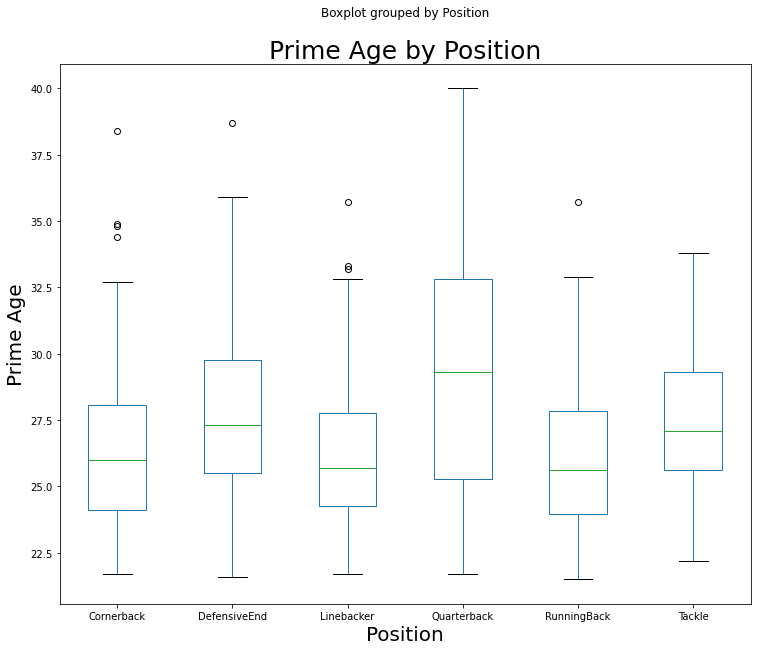

In [16]:
bp = Player_Max_df.boxplot(by = 'Position', column=['Age'],  grid= False, figsize=(12, 10), showfliers = True)
plt.title("Prime Age by Position", size=25)
# bp.get_figure().gca().set_title("")
plt.xlabel('Position', size=20)
plt.ylabel('Prime Age', size=20)
plt.show()

From the boxplot, it appears there is a large correlation between the three skills positions of Running Back, Cornerback and Linebacker. These positions have a much larger emphasis on speed comparative to the other three. Alternatively, there appears to be a correlation between the positions of Tackle and Defensive End. While speed is significant at these positions, power and strength are arguably superior. No position appears to correlate with Quarterback with them hitting their prime performance much later into their career. The quarterback position has a larger mental learning curve and takes many years for them to acclimate from college to pro. Additionally, recent rules changes over the last decade have been implemented to protect the health of this vital position. This data is crucial in determining the future value of players during contract negotiations in a salary cap league. 

In [11]:
# Breakdown of colleges that produced the most amount of players in the NFL over the last 10 years at one of these positions
College_df = Player_df[['Name', 'Position', 'College', 'Year']]
# Max year to remove duplicates and get the last year that an individual played
College_df = Player_df.groupby(['Name', 'College', 'Position'])['Year'].max()
College_Position_df = College_df.groupby(['College', 'Position']).count()
College_Position_df.sort_values(ascending=False).head(20)

College     Position    
LSU         Cornerback      12
FLORIDA ST  Cornerback      11
USC         DefensiveEnd    11
GEORGIA     DefensiveEnd    11
FLORIDA     Cornerback      10
LSU         Linebacker      10
ALABAMA     Cornerback      10
TEXAS       Cornerback      10
ALABAMA     Linebacker      10
MIAMI FL    Linebacker      10
OHIO STATE  Cornerback       9
ALABAMA     RunningBack      9
MIAMI FL    DefensiveEnd     9
OHIO STATE  DefensiveEnd     9
            Linebacker       9
WASHINGTON  Cornerback       9
S CAROLINA  Cornerback       8
CLEMSON     Cornerback       8
MICHIGAN    DefensiveEnd     8
USC         Linebacker       8
Name: Year, dtype: int64

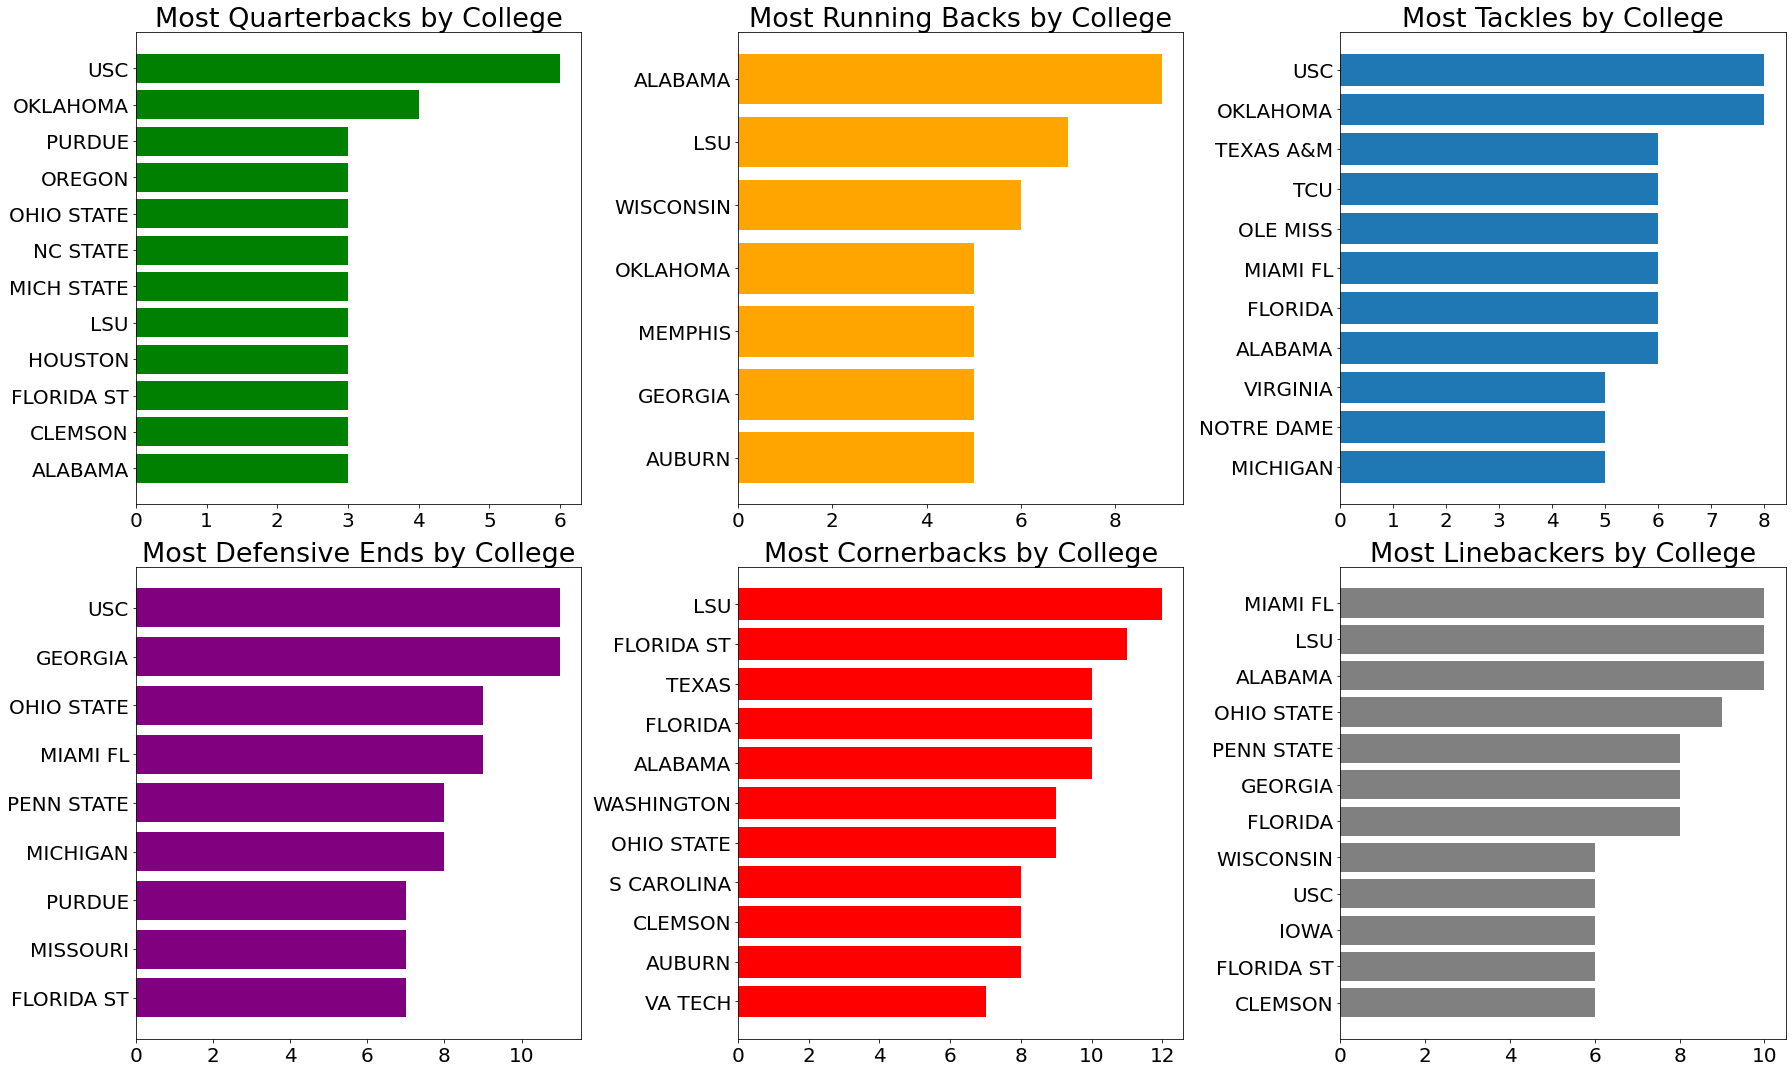

In [12]:
College_df = Player_df[['Name', 'Position', 'College', 'Year']]
College_df = ps.sqldf("Select distinct Name, Position, College from College_df group by Name")
CB_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'Cornerback' group by College, Position having count(Position) > 6 order by count(Position)")
LB_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'Linebacker' group by College, Position having count(Position) > 5 order by count(Position)")
DE_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'DefensiveEnd' group by College, Position having count(Position) > 6 order by count(Position)")
QB_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'Quarterback' group by College, Position having count(Position) > 2 order by count(Position)")
RB_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'RunningBack' group by College, Position having count(Position) > 4 order by count(Position)")
T_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'Tackle' group by College, Position having count(Position) > 4 order by count(Position)")
# T_df.plot(kind = 'bar', x = 'College', y = 'count(Position)')
# plt.show()
plt.figure(figsize = (25, 15))
plt.subplot(231)
plt.barh(QB_df['College'], QB_df['count(Position)'], color='green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Quarterbacks by College', fontsize=27)

plt.subplot(232)
plt.barh(RB_df['College'], RB_df['count(Position)'], color='orange')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Running Backs by College', fontsize=27)

plt.subplot(233)
plt.barh(T_df['College'], T_df['count(Position)'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Tackles by College', fontsize=27)

plt.subplot(234)
plt.barh(DE_df['College'], DE_df['count(Position)'], color='Purple')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Defensive Ends by College', fontsize=27)

plt.subplot(235)
plt.barh(CB_df['College'], CB_df['count(Position)'], color='Red')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Cornerbacks by College', fontsize=27)

plt.subplot(236)
plt.barh(LB_df['College'], LB_df['count(Position)'], color='Grey')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Linebackers by College', fontsize=27)


plt.tight_layout()
plt.show()
